In [1]:
# Target:  Can you accurately predict insurance costs?

In [25]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [26]:
insurance_info = pd.read_csv("data/insurance.csv")

insurance_info.shape

(1338, 7)

# data profiling

In [4]:
insurance_info.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_info.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [6]:
insurance_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_info['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
insurance_info['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
insurance_info['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
insurance_info.isna().sum()  # 'isnull' is an alias for 'isna'

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Feature Engineering

In [27]:
#Let's try one-hot encoding for our dataframe. so,it's all numbers
ins = pd.get_dummies(insurance_info,columns=['sex','smoker','region'],sparse=False)  # this method not converting to numerical

ins.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,True,False,False,True,False,False,False,True
1,18,33.77,1,1725.5523,False,True,True,False,False,False,True,False


In [28]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto' , handle_unknown='ignore')
data = enc.fit_transform(insurance_info[['sex','smoker','region']])
df1 = pd.DataFrame(data.toarray(), columns=enc.get_feature_names_out(), dtype=int)
ins_df = insurance_info.join(df1)
ins_df.head(2)

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,0,1,0,0,0,1
1,18,male,33.77,1,no,southeast,1725.5523,0,1,1,0,0,0,1,0


In [52]:
ins_df.shape

(1338, 15)

In [29]:
ins_df_final = ins_df.drop(['sex','smoker','region'],axis=1)

ins_df_final.shape

(1338, 12)

In [65]:
ins_df_final.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0


In [67]:
ins_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int32  
 5   sex_male          1338 non-null   int32  
 6   smoker_no         1338 non-null   int32  
 7   smoker_yes        1338 non-null   int32  
 8   region_northeast  1338 non-null   int32  
 9   region_northwest  1338 non-null   int32  
 10  region_southeast  1338 non-null   int32  
 11  region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 83.8 KB


# dividing data into features & labels

Create X & Y values(features and labels)

Create training and test sets

Build a neural network (regression)

In [30]:
# create X & Y values
X = ins_df_final.drop('charges',axis=1)

Y = ins_df_final['charges']

X.shape  , Y.shape

((1338, 11), (1338,))

In [90]:
X.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0


In [91]:
Y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [31]:
# create training & test datasets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)

len(X) , len(x_train) , len(x_test)

(1338, 1070, 268)

In [80]:
len(Y) , len(y_train) , len(y_test)

(1338, 1070, 268)

In [83]:
x_train.shape

(1070, 11)

# Building Model

1. creating a model

2. compiling the model

3. fitting the model

4. Evaluating metrics

5. predictions on new data

In [32]:
#Building Regression Nueral network model
tf.random.set_seed(42)
#1. creating a model
ins_model_1 = tf.keras.Sequential()
ins_model_1.add(tf.keras.layers.Dense(100)),
ins_model_1.add(tf.keras.layers.Dense(1))
#2. compiling the model
ins_model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])
#3. fitting the model
ins_model_1.fit(x_train , y_train , epochs=100 , verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12949.1621 - mae: 12949.1621
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 10571.3525 - mae: 10571.3525
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7695.5088 - mae: 7695.5088
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7439.7612 - mae: 7439.7612
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7361.5317 - mae: 7361.5317
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7296.4478 - mae: 7296.4478
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7210.7393 - mae: 7210.7393
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7132.7900 - mae: 7132.7900
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7047.9224 - mae: 7047.9224
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6959.1689 - mae: 6959.

34/34 [==============================] - 0s 3ms/step - loss: 3689.1648 - mae: 3689.1648
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 3688.7280 - mae: 3688.7280
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 3726.8979 - mae: 3726.8979
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 3677.2590 - mae: 3677.2590
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 3678.8445 - mae: 3678.8445
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 3677.2571 - mae: 3677.2571
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 3667.8110 - mae: 3667.8110
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 3679.9431 - mae: 3679.9431
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 3656.1663 - mae: 3656.1663
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 3654.2788 - mae: 3654.2788
Epo

In [33]:
#4. Evaluating metrics
ins_model_1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3435.9766 - mae: 3435.9766


[3435.9765625, 3435.9765625]

In [34]:
y_train.mean()  ,  y_train.median() 

(13346.089736364485, 9575.4421)

In [40]:
y1_pred = ins_model_1.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [41]:
ins_mae_1 = tf.metrics.mean_absolute_error(y_test , y1_pred)

In [46]:
ins_mse_1 = tf.metrics.mean_squared_error(y_test , y1_pred)

# improving the model

In [35]:
tf.random.set_seed(42)
#1. creating a model
ins_model_2 = tf.keras.Sequential()
ins_model_2.add(tf.keras.layers.Dense(100)),
ins_model_2.add(tf.keras.layers.Dense(100)),
ins_model_2.add(tf.keras.layers.Dense(100)),
ins_model_2.add(tf.keras.layers.Dense(1))
#2. compiling the model
ins_model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])
#3. fitting the model
history = ins_model_2.fit(x_train , y_train , epochs=200 , verbose=1)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 8681.9658 - mae: 8681.9658
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 6755.2856 - mae: 6755.2856
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 6372.6182 - mae: 6372.6182
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 5781.1250 - mae: 5781.1250
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 4449.2651 - mae: 4449.2651
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 3909.4160 - mae: 3909.4160
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 4327.3677 - mae: 4327.3677
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 4013.0789 - mae: 4013.0789
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 3920.2854 - mae: 3920.2854
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3908.3940 - mae: 3908.3940

34/34 [==============================] - 0s 4ms/step - loss: 3760.3118 - mae: 3760.3118
Epoch 83/200
34/34 [==============================] - 0s 3ms/step - loss: 3790.9497 - mae: 3790.9497
Epoch 84/200
34/34 [==============================] - 0s 3ms/step - loss: 3679.7964 - mae: 3679.7964
Epoch 85/200
34/34 [==============================] - 0s 3ms/step - loss: 3608.3169 - mae: 3608.3169
Epoch 86/200
34/34 [==============================] - 0s 3ms/step - loss: 3624.6609 - mae: 3624.6609
Epoch 87/200
34/34 [==============================] - 0s 4ms/step - loss: 3871.5977 - mae: 3871.5977
Epoch 88/200
34/34 [==============================] - 0s 3ms/step - loss: 3586.3989 - mae: 3586.3989
Epoch 89/200
34/34 [==============================] - 0s 3ms/step - loss: 3622.8669 - mae: 3622.8669
Epoch 90/200
34/34 [==============================] - 0s 3ms/step - loss: 3654.7314 - mae: 3654.7314
Epoch 91/200
34/34 [==============================] - 0s 4ms/step - loss: 3537.2310 - mae: 3537.2310
Epo

34/34 [==============================] - 0s 4ms/step - loss: 3582.4634 - mae: 3582.4634
Epoch 163/200
34/34 [==============================] - 0s 3ms/step - loss: 3655.5237 - mae: 3655.5237
Epoch 164/200
34/34 [==============================] - 0s 3ms/step - loss: 3599.8501 - mae: 3599.8501
Epoch 165/200
34/34 [==============================] - 0s 4ms/step - loss: 3601.8459 - mae: 3601.8459
Epoch 166/200
34/34 [==============================] - 0s 3ms/step - loss: 3571.0303 - mae: 3571.0303
Epoch 167/200
34/34 [==============================] - 0s 3ms/step - loss: 3641.5886 - mae: 3641.5886
Epoch 168/200
34/34 [==============================] - 0s 3ms/step - loss: 3599.6238 - mae: 3599.6238
Epoch 169/200
34/34 [==============================] - 0s 3ms/step - loss: 3764.2388 - mae: 3764.2388
Epoch 170/200
34/34 [==============================] - 0s 3ms/step - loss: 3650.9109 - mae: 3650.9109
Epoch 171/200
34/34 [==============================] - 0s 4ms/step - loss: 3637.8792 - mae: 3637

In [36]:
#Evaluate the model
ins_model_2.evaluate(x_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3275.3867 - mae: 3275.3867


[3275.38671875, 3275.38671875]

In [42]:
ins_model_2.evaluate(x_test , y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3275.3867 - mae: 3275.3867


[3275.38671875, 3275.38671875]

In [43]:
y2_pred = ins_model_2.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [47]:
ins_mae_2 = tf.metrics.mean_absolute_error(y_test , y2_pred) 

In [48]:
ins_mse_2 = tf.metrics.mean_squared_error(y_test , y2_pred)

Text(0.5, 0, 'epochs')

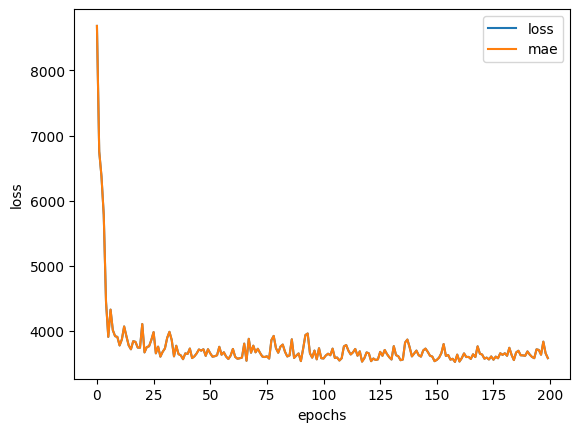

In [38]:
#plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# How long should you train for?

It depends on the problem you're working on. However, many people have asked this solution!. Its called the EarlyStopping callback. which is a TensorFlow component you can add to your model after improving a certain metric.

Ref : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

# Preprocessing data(normalization and standardization)

In [3]:
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [4]:
data = pd.read_csv("data/insurance.csv")
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [50]:
#create a column transformer

ct = make_column_transformer(
         (MinMaxScaler(),["age" , "bmi" , "children"]),
         (OneHotEncoder(handle_unknown="ignore") , ["sex" , "smoker" , "region"])
)

# Building  X &  Y
X = data.drop("charges" , axis=1)
Y = data["charges"]

# create train ,test sets
x_train_org , x_test_org , y_train_org , y_test_org = train_test_split(X , Y , test_size=0.2 , random_state=42)

#fit the column transformer to the train data
ct.fit(x_train_org)

#Transform training & test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_norm = ct.transform(x_train_org)
x_test_norm = ct.transform(x_test_org)


AttributeError: drop not found

In [12]:
#what does our data look like now?
x_train.loc[0] 


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [14]:
x_test_norm[0] 

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [16]:
x_train.shape   ,  x_train_norm.shape

((1070, 6), (1070, 11))

In [22]:
# Build a neural network model & fit it on our normalized data

tf.random.set_seed(42)
#1. creating a model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(100,activation='relu')),
model1.add(tf.keras.layers.Dense(100 , activation='relu')),
model1.add(tf.keras.layers.Dense(1))

#2. compiling a model
model1.compile(loss =  tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ["mae"])

#fitting the model

model1.fit(x_train_norm , y_train , epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 13019.3613 - mae: 13019.3613
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 9040.9600 - mae: 9040.9600
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 7571.7412 - mae: 7571.7412
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 6613.2109 - mae: 6613.2109
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 5161.0142 - mae: 5161.0142
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 3949.8174 - mae: 3949.8174
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 3579.4600 - mae: 3579.4600
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 3454.6792 - mae: 3454.6792
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 3372.6328 - mae: 3372.6328
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 3307.7949 - mae: 3307.79

34/34 [==============================] - 0s 3ms/step - loss: 2012.7968 - mae: 2012.7968
Epoch 83/150
34/34 [==============================] - 0s 4ms/step - loss: 2011.3845 - mae: 2011.3845
Epoch 84/150
34/34 [==============================] - 0s 3ms/step - loss: 2001.1493 - mae: 2001.1493
Epoch 85/150
34/34 [==============================] - 0s 3ms/step - loss: 2011.4390 - mae: 2011.4390
Epoch 86/150
34/34 [==============================] - 0s 4ms/step - loss: 2005.2745 - mae: 2005.2745
Epoch 87/150
34/34 [==============================] - 0s 3ms/step - loss: 2017.1313 - mae: 2017.1313
Epoch 88/150
34/34 [==============================] - 0s 3ms/step - loss: 2000.8727 - mae: 2000.8727
Epoch 89/150
34/34 [==============================] - 0s 3ms/step - loss: 2016.5647 - mae: 2016.5647
Epoch 90/150
34/34 [==============================] - 0s 3ms/step - loss: 2023.3983 - mae: 2023.3983
Epoch 91/150
34/34 [==============================] - 0s 3ms/step - loss: 2010.6671 - mae: 2010.6671
Epo

In [24]:
#4. Evaluate our model trained on normalized data

model1.evaluate(x_test_norm , y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1758.1082 - mae: 1758.1082


[1758.108154296875, 1758.108154296875]

In [49]:
y3_pred = model1.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
y3_mae = tf.metrics.mean_absolute_error(y_test)

In [39]:
#Comparing the models

import numpy as np

model_results = [["ins_model_1" , ins_mae_1.numpy() , ins_mse_1.numpy()],
                 ["ins_model_2" , ins_mae_2.numpy() , ins_mse_2.numpy()],
                 ["model1" , mae_2.numpy() , mse_2.numpy()]]

all_results = pd.DataFrame(model_results , columns= ['model_Name' , "MAE" , "MSE"])
all_results

NameError: name 'mae_1' is not defined